In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Tracking chido.csv")
df

,Job requisition,Job Description adjustments meeting,Start Date,Short list,Interviews Hiring manager,Tests,Reference check,Offer made,Offer acceptance,End date
0,3-abr.,4-abr.,18-abr.,20-abr.,23-abr.,25-abr.,30-abr.,6-may.,6-may.,8-may.
1,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.
2,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.
3,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.
4,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.
...,...,...,...,...,...,...,...,...,...,...
239,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.
240,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.
241,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.
242,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.


In [3]:
df = df.drop_duplicates()
df

,Job requisition,Job Description adjustments meeting,Start Date,Short list,Interviews Hiring manager,Tests,Reference check,Offer made,Offer acceptance,End date
0,3-abr.,4-abr.,18-abr.,20-abr.,23-abr.,25-abr.,30-abr.,6-may.,6-may.,8-may.
1,0-ene.,1-ene.,15-ene.,17-ene.,20-ene.,22-ene.,27-ene.,2-feb.,2-feb.,4-feb.
8,15-jun.,16-jun.,30-jun.,2-jul.,5-jul.,7-jul.,12-jul.,18-jul.,18-jul.,20-jul.


In [4]:
df = df.drop('Job requisition',axis=1)


In [5]:
df = df.drop('Job Description adjustments meeting',axis=1)

In [6]:
columns=df.columns

La diferencia en días entre 18-Apr y Short list es: 2 días
La diferencia en días entre 20-Apr y Interviews Hiring manager es: 3 días
La diferencia en días entre 23-Apr y Tests es: 2 días
La diferencia en días entre 25-Apr y Reference check es: 5 días
La diferencia en días entre 30-Apr y Offer made es: 6 días
La diferencia en días entre 6-May y Offer acceptance es: 0 días
La diferencia en días entre 6-May y End date es: 2 días


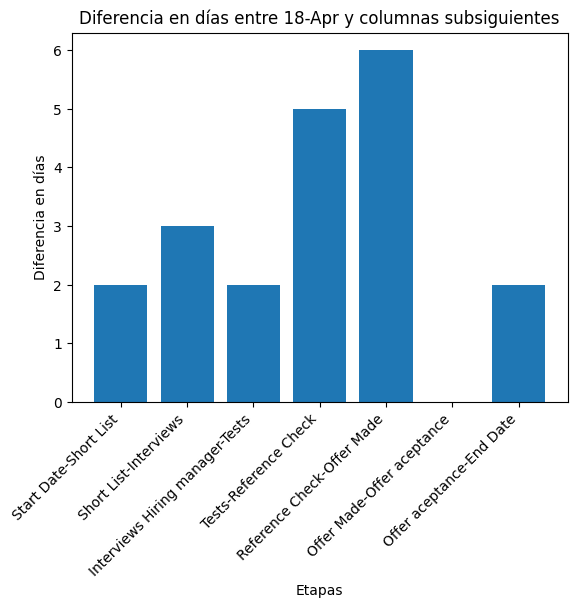

In [7]:
meses = {
    'ene.': 'Jan',
    'feb.': 'Feb',
    'mar.': 'Mar',
    'abr.': 'Apr',
    'may.': 'May',
    'jun.': 'Jun',
    'jul.': 'Jul',
    'ago.': 'Aug',
    'sep.': 'Sep',
    'oct.': 'Oct',
    'nov.': 'Nov',
    'dic.': 'Dec'
}

# Crear una función para calcular la diferencia en días entre dos fechas
def calcular_diferencia_dias(fecha_inicio, fecha_fin):
    formato = "%d-%b"
    fecha_inicio = datetime.strptime(fecha_inicio, formato)
    fecha_fin = datetime.strptime(fecha_fin, formato)
    # Establecer un año ficticio (puede ser cualquier año, ya que no se utilizará)
    fecha_inicio = fecha_inicio.replace(year=2000)
    fecha_fin = fecha_fin.replace(year=2000)
    diferencia = fecha_fin - fecha_inicio
    return diferencia.days



# Ingresa la fecha de inicio
fecha_inicio_input = input("Ingresa la fecha de inicio (por ejemplo, 18-abr.): ").lower()

# Agregar el punto al final a la fecha de inicio si no está presente
if not fecha_inicio_input.endswith('.'):
    fecha_inicio_input += '.'

# Verificar si la fecha de inicio existe en el DataFrame
if fecha_inicio_input in df['Start Date'].values:
    # Obtener el índice de la fila correspondiente a la fecha de inicio
    indice_fila_inicio = df[df['Start Date'] == fecha_inicio_input].index[0]

    # Calcular la diferencia de días entre fechainicio y la primera columna
    try:
        fecha_primera_columna = df.at[indice_fila_inicio, df.columns[df.columns.get_loc('Start Date') + 1]]
        for mes_abr, mes_eng in meses.items():
            fecha_inicio_input = fecha_inicio_input.replace(mes_abr, mes_eng)
            fecha_primera_columna = fecha_primera_columna.replace(mes_abr, mes_eng)
        diferencia_primera_columna = calcular_diferencia_dias(fecha_inicio_input, fecha_primera_columna)
        print(f"La diferencia en días entre {fecha_inicio_input} y {df.columns[df.columns.get_loc('Start Date') + 1]} es: {diferencia_primera_columna} días")
    except KeyError:
        print("No hay ninguna columna después de fechainicio.")

    # Almacenar las diferencias en días en una lista para graficar
    diferencias_en_dias = [diferencia_primera_columna]

    # Iterar sobre las columnas y calcular la diferencia en días
    for columna_actual in df.columns[df.columns.get_loc('Start Date') + 1:df.columns.get_loc('End date')]:
        try:
            # Obtener la fecha de la columna actual utilizando el índice de la fila de inicio
            fecha_actual = df.at[indice_fila_inicio, columna_actual]

            # Modificar la abreviatura del mes según el mapeo
            for mes_abr, mes_eng in meses.items():
                fecha_actual = fecha_actual.replace(mes_abr, mes_eng)

            # Obtener la fecha de la siguiente columna
            columna_siguiente = df.columns[df.columns.get_loc(columna_actual) + 1]
            fecha_siguiente = df.at[indice_fila_inicio, columna_siguiente]

            # Modificar la abreviatura del mes según el mapeo
            for mes_abr, mes_eng in meses.items():
                fecha_siguiente = fecha_siguiente.replace(mes_abr, mes_eng)

            # Calcula la diferencia en días
            diferencia_dias = calcular_diferencia_dias(fecha_actual, fecha_siguiente)

            # Almacenar la diferencia en días en la lista
            diferencias_en_dias.append(diferencia_dias)

            # Imprime el resultado
            print(f"La diferencia en días entre {fecha_actual} y {columna_siguiente} es: {diferencia_dias} días")

        except KeyError:
            print(f"No hay ninguna columna después de {columna_actual}.")
            break

    columnas_personalizadas = ['Start Date-Short List', 'Short List-Interviews', 'Interviews Hiring manager-Tests', 'Tests-Reference Check', 'Reference Check-Offer Made', 'Offer Made-Offer aceptance', 'Offer aceptance-End Date']
    plt.bar(columnas_personalizadas, diferencias_en_dias)
    plt.xlabel('Etapas')
    plt.ylabel('Diferencia en días')
    plt.title(f'Diferencia en días entre {fecha_inicio_input} y columnas subsiguientes')
    plt.xticks(rotation=45, ha="right")
    plt.show()

else:
    print(f"La fecha de inicio {fecha_inicio_input} no existe en el DataFrame.")